### Combine proportion of fish per hour sampled datasets of Dungeness from 2006-2014

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates

In [5]:
years = range(2006,2015)
csv_names = []
for year in years:
    csv_names.append("C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_time.csv")
    
df_time = pd.concat([pd.read_csv(csv_name, header=0) for csv_name in csv_names])
df_time.rename(columns = {
    'Unnamed: 0':'Hour'
}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_time)

,Hour,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Wild UC,Coho1_Wldunmk,Coho1_Hat-AD,Steelhead1_Hat-AD,Steelhead1_WldUC,Steelhead1_Wldunmk,Trout Parr_Steely,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook1_Hat1,Coho1_Wild1,Chinook1_Hat_all,Chinook0_Hat1,Coho1_Hat1,Chinook0_Hat_all,Coho1_Hat_all,Coho1_Hat2,Coho1_Hat3,Steelhead1_Hat1,Steelhead1_Hat_all,Chinook0_Hat2,Chinook1_Hat2
0,00:00:00,0.591343,1.811977,0.000791,0.011068,0.086962,0.459319,0.055340,0.003953,0.012649,0.101983,0.154160,0.157213,0.107636,0.000010,0.046635,0.025415,0.546281,0.108531,0.114632,0.142356,0.042900,0.078156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01:00:00,0.447817,3.069493,0.153036,0.007526,0.047667,0.541897,0.230808,0.023833,0.015053,0.140492,0.077772,0.119056,0.182336,0.001982,0.031712,0.106000,0.589563,0.117130,0.155544,0.193163,0.258664,0.039429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:00:00,0.433001,3.763364,0.021383,0.053457,0.053457,0.946187,0.866001,0.053457,0.005346,0.363507,0.294013,0.115116,0.223553,0.000277,0.225240,0.397716,0.999644,0.198601,0.368852,0.458060,0.580167,0.149059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03:00:00,0.000000,1.714286,0.357143,0.142857,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.101833,0.004625,0.601926,0.000000,0.071429,0.014191,0.000000,0.000000,0.000000,0.144851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.858896,0.000000,0.000000,0.000000,0.000000,0.245399,0.000000,0.000000,0.000000,0.000000,0.000000,0.858896,0.170639,0.000000,0.000000,0.000000,0.124412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11:00:00,0.018154,0.226929,0.000000,0.000000,0.000000,0.018154,0.000000,0.000000,0.000000,0.000000,0.018154,0.004826,0.013480,0.000000,0.000000,0.000000,0.018154,0.003607,0.000000,0.000000,0.000000,0.009204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:00:00,0.052061,0.373318,0.000000,0.001270,0.002540,0.059680,0.019047,0.003809,0.000000,0.002540,0.011428,0.013841,0.022176,0.000000,0.005350,0.008747,0.062220,0.012361,0.002540,0.003154,0.041343,0.005794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13:00:00,0.013933,0.853901,0.001990,0.001990,0.000000,0.061704,0.000000,0.000000,0.000000,0.011943,0.009952,0.003704,0.050724,0.000026,0.008387,0.000000,0.061704,0.012259,0.011943,0.014831,0.000000,0.005046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14:00:00,0.029933,0.279371,0.029933,0.004989,0.000000,0.024944,0.009978,0.000000,0.000000,0.009978,0.000000,0.007958,0.016595,0.000388,0.021020,0.004582,0.024944,0.004956,0.009978,0.012391,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#groupby hour of day
groupedby_hour = df_time.groupby(by=["Hour"]).agg({'Chinook0_Hat_prop':['mean','std'],
                                            'Chinook0_Wild_prop':['mean','std'],
                                            'Chinook1_Hat_prop':['mean','std'],
                                            'Chinook1_Wild_prop':['mean','std'],
                                            'Coho1_Hat_prop':['mean','std'],
                                            'Coho1_Wild_prop':['mean','std'],
                                            'Steelhead1_Hat_prop':['mean','std'],
                                            'Steelhead1_Wild_prop':['mean','std'],
                                            'Steelhead1_Parr_prop':['mean','std']})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_hour)

Chinook0_Hat_prop           Chinook0_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.044880  0.052297           0.062321  0.063157   
01:00:00          0.132358  0.110572           0.088545  0.053341   
02:00:00          0.188691  0.191578           0.096339  0.059946   
03:00:00          0.104511  0.108887           0.112819  0.070648   
04:00:00          0.106767  0.211127           0.047190  0.049968   
05:00:00          0.016666  0.031538           0.064110  0.027073   
06:00:00          0.180945  0.312299           0.120240  0.111770   
07:00:00          0.002616  0.004531           0.018327  0.023172   
08:00:00          0.003842  0.006654           0.027467  0.029620   
09:00:00          0.000000  0.000000           0.009422  0.016319   
10:00:00          0.006612  0.014785           0.043448  0.066280   
11:00:00          0.017823  0.019687           0.015338  0.015220   
12:00:00          0.002400  0.004469           0.010703  0.010523   
13:00:00          0.008691  0.011349           0.018417  0.014935   
14:00:00          0.011087  0.010739           0.014638  0.006087   
15:00:00          0.028191  0.048665           0.022622  0.021167   
16:00:00          0.002846  0.004921           0.020293  0.018046   
17:00:00          0.014213  0.021056           0.034940  0.030669   
18:00:00          0.093500  0.155467           0.108698  0.096154   
19:00:00          0.044598  0.062891           0.106510  0.136633   
20:00:00          0.019476  0.045184           0.064413  0.063624   
21:00:00          0.069863  0.111392           0.081414  0.109283   
22:00:00          0.053244  0.075538           0.098002  0.084184   
23:00:00          0.118102  0.193342           0.103714  0.146578   

         Chinook1_Hat_prop           Chinook1_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.089231  0.178611           0.087659  0.099338   
01:00:00          0.059593  0.149166           0.216674  0.230827   
02:00:00          0.009698  0.017327           0.341534  0.300867   
03:00:00          0.005699  0.010130           0.180821  0.226881   
04:00:00          0.073364  0.175880           0.008063  0.024188   
05:00:00          0.176774  0.313837           0.000000  0.000000   
06:00:00          0.008735  0.015129           0.000000  0.000000   
07:00:00          0.000000  0.000000           0.000000  0.000000   
08:00:00          0.000000  0.000000           0.000000  0.000000   
09:00:00          0.000000  0.000000           0.000000  0.000000   
10:00:00          0.000919  0.002054           0.000000  0.000000   
11:00:00          0.000000  0.000000           0.000000  0.000000   
12:00:00          0.001312  0.002814           0.001760  0.003721   
13:00:00          0.003704  0.009161           0.005790  0.009579   
14:00:00          0.001094  0.002909           0.025138  0.028892   
15:00:00          0.002056  0.006167           0.000000  0.000000   
16:00:00          0.047374  0.116042           0.056683  0.138844   
17:00:00          0.000000  0.000000           0.000000  0.000000   
18:00:00          0.107476  0.186154           0.000000  0.000000   
19:00:00          0.000000  0.000000           0.000000  0.000000   
20:00:00          0.205591  0.284632           0.001243  0.003044   
21:00:00          0.313386  0.377162           0.085648  0.242250   
22:00:00          0.212776  0.230957           0.008796  0.024877   
23:00:00          0.000104  0.000198           0.011245  0.022264   

         Coho1_Hat_prop           Coho1_Wild_prop            \
                   mean       std            mean       std   
Hour                                                          
00:00:00       0.022762  0.056798        0.028777  0.031871   
01:00:00       0.079831  0.10

In [11]:
list_names = []
for col in groupedby_hour.columns.values:
    
    list_names.append(str(col[0]) + '_' + str(col[1]))
    
    
groupedby_hour.columns = list_names

In [44]:
def plot_by_hour(species = "Chinook", year = "0", fish_type = "Hat"):
    x_string = species + year + '_' + fish_type +'_prop_mean'
    if fish_type == "Wild":
        c = 'salmon'
    else:
        c = 'seagreen'
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.bar(pd.to_datetime(groupedby_hour.index).hour, 
            groupedby_hour[x_string],
            tick_label = pd.to_datetime(groupedby_hour.index).hour,
           color = c)##Bar plot
   
    plt.xlabel('Hour') ## Label on X axis
    plt.ylabel('Proportion of fish') ##Label on Y axis
    plt.show()

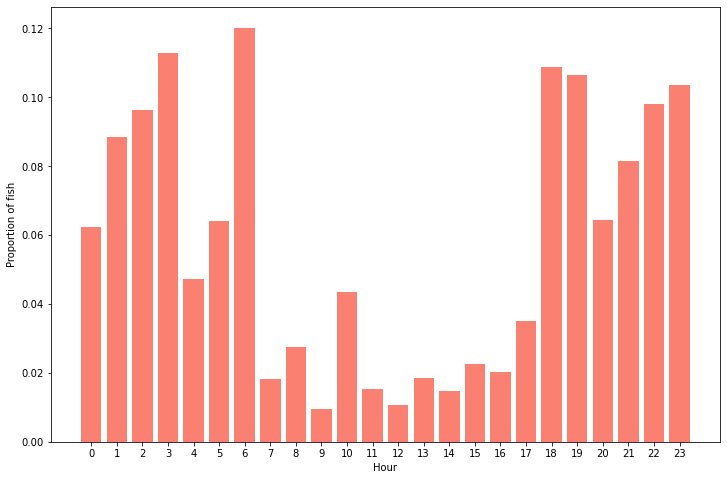

In [46]:
plot_by_hour("Chinook","0","Wild")

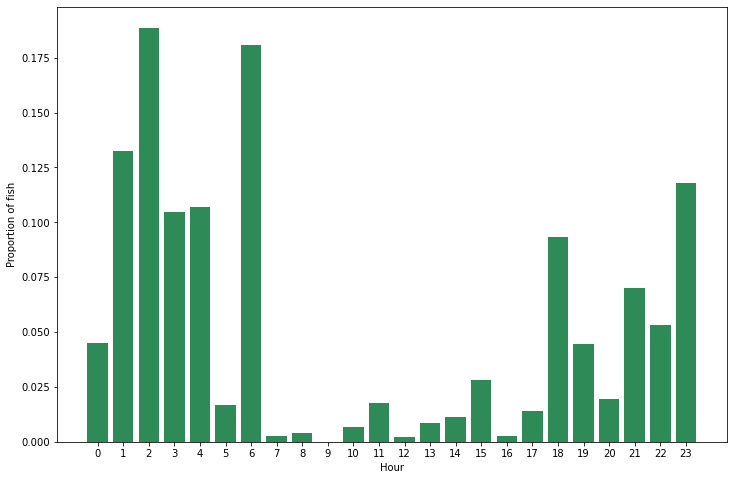

In [47]:
plot_by_hour("Chinook","0","Hat")

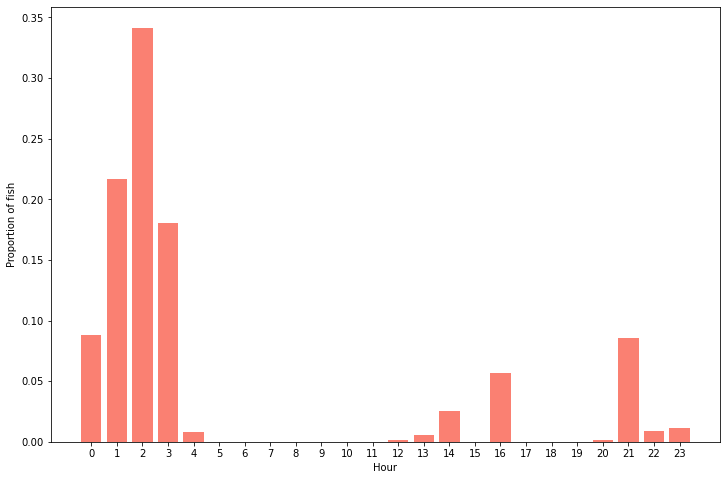

In [48]:
plot_by_hour("Chinook","1","Wild")

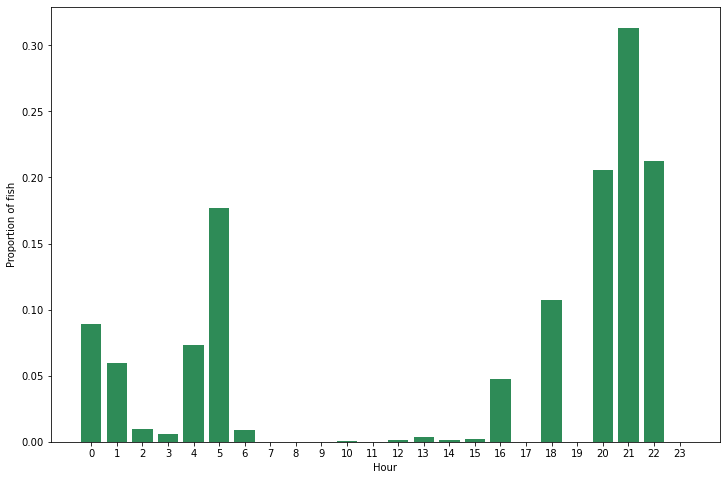

In [49]:
plot_by_hour("Chinook","1","Hat")

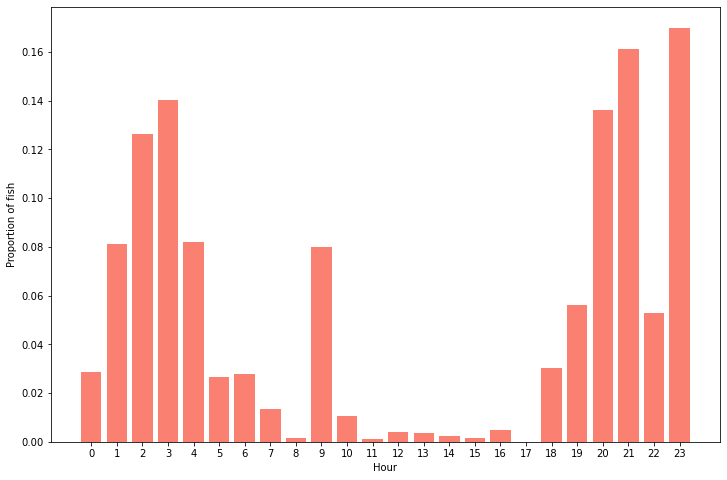

In [50]:
plot_by_hour("Coho","1","Wild")

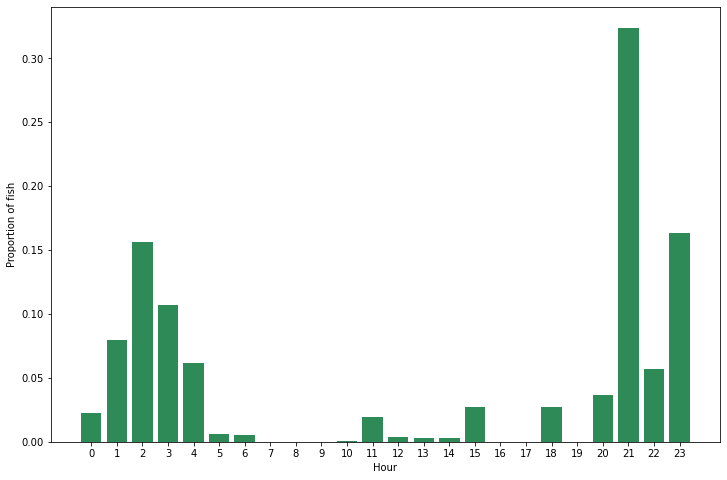

In [51]:
plot_by_hour("Coho","1","Hat")

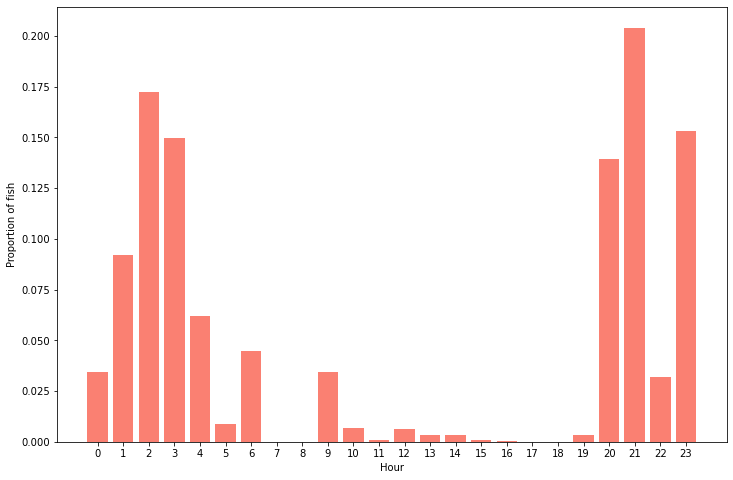

In [53]:
plot_by_hour("Steelhead","1","Wild")

In [6]:
plot_by_hour("Steelhead","1","Hat")

NameError: name 'plot_by_hour' is not defined

In [11]:
df_midpoint = df_time.set_index('Hour')

groupedby_daylight = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_daylight)


,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Wild UC,Coho1_Wldunmk,Coho1_Hat-AD,Steelhead1_Hat-AD,Steelhead1_WldUC,Steelhead1_Wldunmk,Trout Parr_Steely,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook1_Hat1,Coho1_Wild1,Chinook1_Hat_all,Chinook0_Hat1,Coho1_Hat1,Chinook0_Hat_all,Coho1_Hat_all,Coho1_Hat2,Coho1_Hat3,Steelhead1_Hat1,Steelhead1_Hat_all,Chinook0_Hat2,Chinook1_Hat2
00:00:00,1.472161,10.359120,0.532352,0.214908,0.188086,2.877726,1.152149,0.081243,0.033047,0.605981,1.057058,5.812205,4.337069,2.871567,7.512748,3.884691,29.934404,4.354585,11.371039,4.766295,4.522797,4.833525,181.395602,98.032867,74.828838,0.815882,6.318935,5.951378,229.482567,12.748974,5.709706,1.946032,3.076271,7.499221,2.710206,18.264026,74.662220,51.298333,9.850436,60.992986,166.458090,0.034775,0.293701,0.015165,3.565670,0.0000,0.015722
08:00:00,0.142653,2.362091,1.460495,0.008249,0.002540,0.164482,0.543310,0.003809,0.000000,0.024460,0.039535,0.622670,1.032698,0.078088,0.294192,0.461678,3.117720,0.412786,0.959658,0.268687,0.073951,0.535078,1.532791,24.280528,0.953092,0.050131,0.332826,0.113926,16.876706,0.312333,0.619821,0.264873,0.050504,1.127594,0.066822,2.741728,0.963945,10.256938,0.170576,10.545072,2.997859,0.000000,0.017319,0.000000,0.041755,0.0051,0.001020
16:00:00,2.146602,4.113097,75.222333,0.014176,0.070880,1.729708,0.481976,0.007088,0.000000,0.141760,0.875871,2.565125,3.630233,6.050345,1.193060,4.653632,26.522128,4.232629,16.973563,3.965018,4.403252,2.631397,59.066283,115.862939,306.589510,0.806711,13.613870,5.797779,2527.793138,32.641409,3.755168,9.517280,3.559355,10.235648,21.928604,21.432635,327.764215,8.946754,85.781940,32.890220,2168.544860,0.006509,0.208288,0.114286,17.461654,0.0000,1.200000


In [16]:
years = range(2006,2015)
csv_names = []
for year in years:
    csv_names.append("C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_time_daylight.csv")
    
df_time = pd.concat([pd.read_csv(csv_name, header=0) for csv_name in csv_names])
df_time.rename(columns = {
    'Unnamed: 0':'Hour'
}, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_time)

,Hour,Chinook0_HatCWT,Chinook0_Unmk Wld,Chinook1_HatCWT,Chinook1_Unmk,Coho1_Wild UC,Coho1_Wldunmk,Coho1_Hat-AD,Steelhead1_Hat-AD,Steelhead1_WldUC,Steelhead1_Wldunmk,Trout Parr_Steely,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Hat_prop,Coho1_Wild_all,Coho1_Wild_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop,Chinook0_Hat,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild2,Coho1_Hat,Steelhead1_Hat,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Wild2,Trout Parr_Wild_Steelhead,Chinook1_Hat1,Coho1_Wild1,Chinook1_Hat_all,Chinook0_Hat1,Coho1_Hat1,Chinook0_Hat_all,Coho1_Hat_all,Coho1_Hat2,Coho1_Hat3,Steelhead1_Hat1,Chinook0_Hat2,Chinook1_Hat2,Steelhead1_Hat_all
0,00:00:00,0.522160,2.406956,0.058116,0.014089,0.069563,0.527443,0.183152,0.014969,0.012768,0.136043,0.140006,0.532370,0.630564,0.027582,0.599964,0.569194,0.597006,0.488730,0.148811,0.645303,0.727478,0.343841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08:00:00,0.034607,0.501503,0.034607,0.001821,0.001214,0.051607,0.021250,0.001821,0.000000,0.006071,0.009714,0.035284,0.131382,0.016425,0.077566,0.066040,0.052822,0.043242,0.006071,0.026328,0.088519,0.023857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16:00:00,0.424055,0.908689,2.014261,0.007572,0.037862,0.533855,0.117372,0.003786,0.000000,0.075724,0.257462,0.432346,0.238055,0.955993,0.322471,0.364766,0.571717,0.468028,0.075724,0.328369,0.184003,0.632302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909545,0.495828,0.590335,0.893981,0.796103,1.527294,0.889244,0.582679,0.920302,0.953046,0.852955,9.488582,4.236519,0.136555,0.083524,0.214113,1.313182,2.547479,0.292334,0.082198,0.000663,0.499818,0.044414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010202,0.089074,0.066201,0.081952,0.161033,0.028330,0.016495,0.011485,0.018140,0.024962,0.147045,0.106428,0.761073,0.015313,0.007657,0.004594,0.023736,0.515294,0.007657,0.001531,0.000766,0.009188,0.007657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080253,0.415099,0.343464,0.024067,0.042864,0.161897,0.094262,0.038975,0.061559,0.021992,0.000000,0.837216,3.546739,0.079449,0.002249,0.005247,0.156650,0.137163,0.006746,0.000000,0.000000,0.038975,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.607121,0.539227,0.221732,0.911620,0.036370,NaN,0.267435,0.175320,0.383576,0.029041,0.465626,0.768996,0.483167,0.024096,0.071042,0.287075,NaN,1.066873,0.020357,0.012048,0.163272,NaN,0.357286,0.815527,0.263395,0.839623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032625,0.171198,0.005622,0.088380,0.002220,NaN,0.015749,0.004383,0.009589,0.000893,0.056303,0.041324,0.153400,0.000000,0.006887,0.016905,NaN,0.065117,0.000626,0.000000,0.004383,NaN,0.043202,0.021288,0.015027,0.021288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360254,0.289574,0.772646,0.000000,0.961410,NaN,0.716817,0.277364,0.606835,0.970066,0.478071,0.456308,0.259469,0.008947,0.000000,0.769460,NaN,28.201610,0.679988,0.008947,0.268416,NaN,0.366836,2.916791,0.626305,2.925738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.435680,0.713279,0.049031,0.982037,0.091483,0.474857,0.364459,0.113890,0.268374,0.484083,0.378716,1.206673,1.575641,0.720992,0.027767,0.083771,NaN,1.973316,0.030590,0.006118,0.107772,NaN,0.226840,NaN,0.391086,0.720992,0.015060,0.152011,1.221733,2.125326,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#groupby hour of day
groupedby_hour = df_time.groupby(by=["Hour"]).agg({'Chinook0_Hat_prop':['mean','std'],
                                            'Chinook0_Wild_prop':['mean','std'],
                                            'Chinook1_Hat_prop':['mean','std'],
                                            'Chinook1_Wild_prop':['mean','std'],
                                            'Coho1_Hat_prop':['mean','std'],
                                            'Coho1_Wild_prop':['mean','std'],
                                            'Steelhead1_Hat_prop':['mean','std'],
                                            'Steelhead1_Wild_prop':['mean','std'],
                                            'Steelhead1_Parr_prop':['mean','std']})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_hour)

Chinook0_Hat_prop           Chinook0_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.710147  0.204174           0.575474  0.105175   
08:00:00          0.055398  0.051991           0.115697  0.047738   
16:00:00          0.234456  0.227130           0.308829  0.099848   

         Chinook1_Hat_prop           Chinook1_Wild_prop            \
                      mean       std               mean       std   
Hour                                                                
00:00:00          0.241533  0.320992           0.856485  0.197023   
08:00:00          0.016749  0.024472           0.043323  0.039130   
16:00:00          0.741717  0.341970           0.100192  0.200767   

         Coho1_Hat_prop           Coho1_Wild_prop            \
                   mean       std            mean       std   
Hour                                                          
00:00:00       0.470729  0.321274        0.588087  0.229274   
08:00:00       0.035884  0.050694        0.022438  0.012917   
16:00:00       0.493387  0.349510        0.389476  0.231659   

         Steelhead1_Hat_prop           Steelhead1_Wild_prop            \
                        mean       std                 mean       std   
Hour                                                                    
00:00:00            0.611099  0.338291             0.626302  0.252272   
08:00:00            0.015076  0.028751             0.018695  0.013156   
16:00:00            0.373825  0.344702             0.355004  0.257021   

         Steelhead1_Parr_prop            
                         mean       std  
Hour                                     
00:00:00             0.609076  0.236133  
08:00:00             0.047944  0.050552  
16:00:00             0.342980  0.258692

In [18]:
list_names = []
for col in groupedby_hour.columns.values:
    
    list_names.append(str(col[0]) + '_' + str(col[1]))
    
    
groupedby_hour.columns = list_names

In [83]:
def plot_by_hour(species = "Chinook", year = "0"):
    x_string_wild = species + year + '_Wild' +'_prop_mean'
    
    x_string_hat = species + year + '_Hat' +'_prop_mean'
    std_string_wild = species + year + '_Wild' +'_prop_std'
    std_string_hat = species + year + '_Hat' +'_prop_std'
    
    bar_width = 3
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    
    ax1.bar(pd.to_datetime(groupedby_hour.index).hour-bar_width/2, 
            groupedby_hour[x_string_wild],
            tick_label = pd.to_datetime(groupedby_hour.index).hour,
           color = 'salmon', alpha = 0.5, width = bar_width, label = 'wild')##Bar plot
    
    ax1.bar(pd.to_datetime(groupedby_hour.index).hour+bar_width/2, 
            groupedby_hour[x_string_hat],
            tick_label = pd.to_datetime(groupedby_hour.index).hour,
           color = 'seagreen', alpha = 0.5, width = bar_width, label = 'hatchery')##Bar plot
    
    ax1.errorbar(pd.to_datetime(groupedby_hour.index).hour - bar_width/2, 
            groupedby_hour[x_string_wild], yerr = groupedby_hour[std_string_wild], fmt = 'none', color = 'black', capsize = 5)
    
    ax1.errorbar(pd.to_datetime(groupedby_hour.index).hour + bar_width/2, 
            groupedby_hour[x_string_hat], yerr = groupedby_hour[std_string_hat], fmt = 'none', color = 'black', capsize = 5)
    
    ax1.set_ylim([0,1])
    ax1.tick_params(labelsize=0.8*fs)
    ax1.set_title(species + year + '+ counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')
    plt.xlabel('Hour', size = 0.9*fs) ## Label on X axis
    plt.ylabel('Proportion of fish', size = 0.9*fs) ##Label on Y axis
    plt.show()

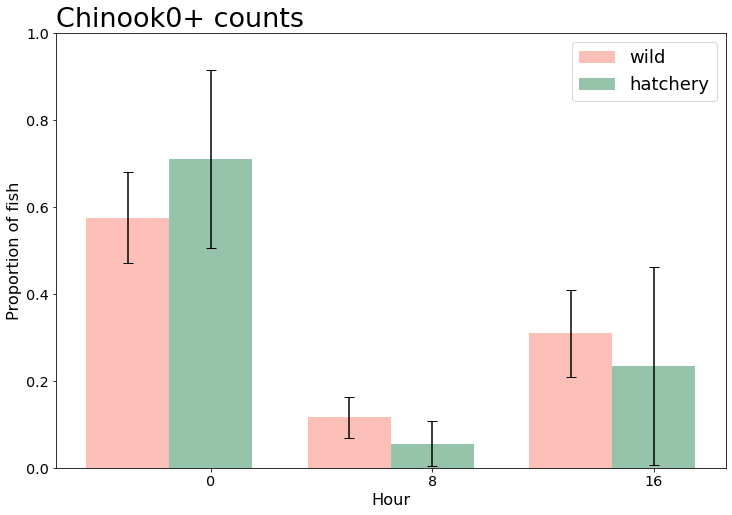

In [84]:
plot_by_hour("Chinook","0")


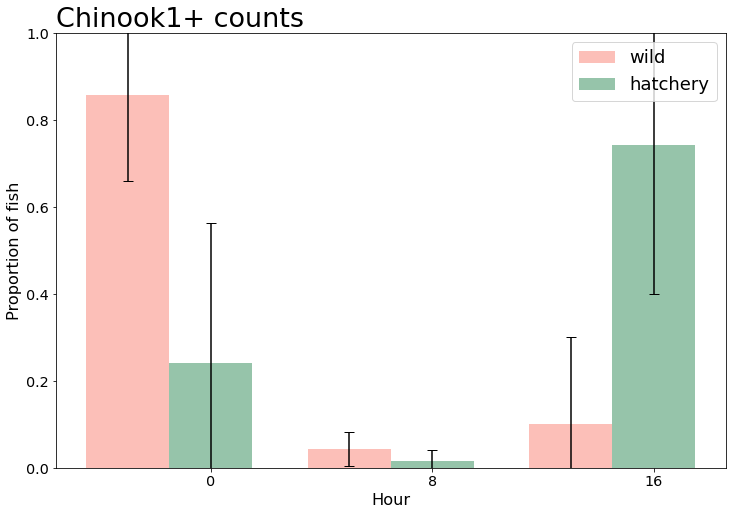

In [85]:
plot_by_hour("Chinook","1")

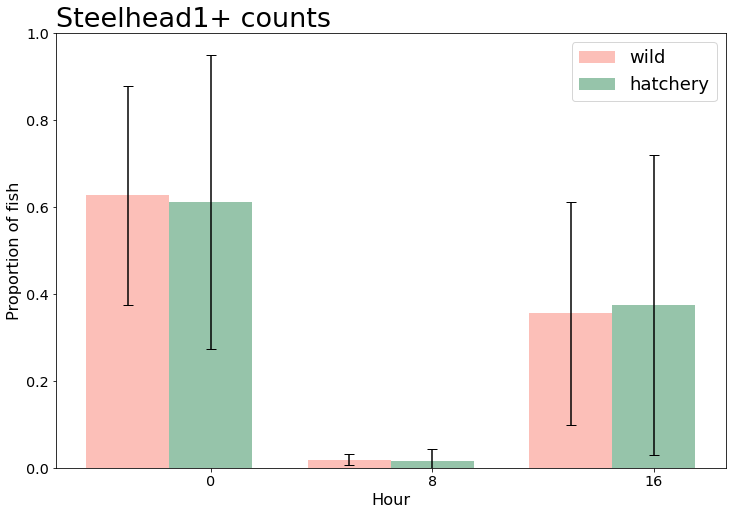

In [86]:
plot_by_hour("Steelhead","1")

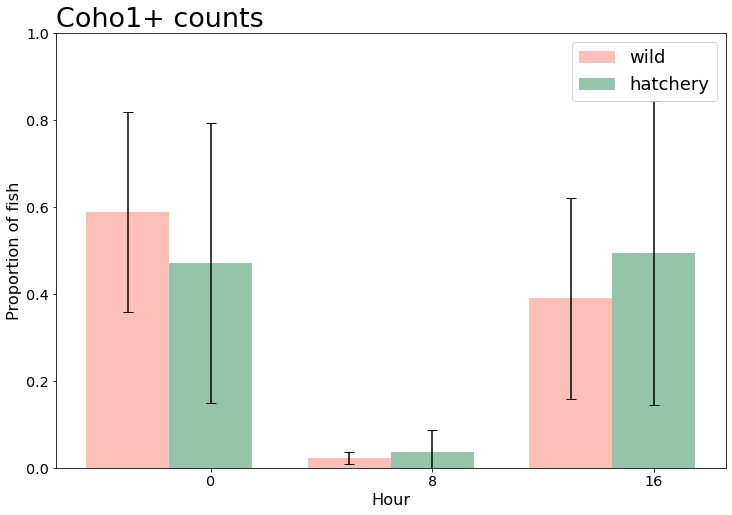

In [87]:
plot_by_hour("Coho","1")

In [135]:
def plot_by_hour_together():
    species = "Chinook"
    year = "0"
    x_string_wild = species + year + '_Wild' +'_prop_mean'
    
    x_string_hat = species + year + '_Hat' +'_prop_mean'
    std_string_wild = species + year + '_Wild' +'_prop_std'
    std_string_hat = species + year + '_Hat' +'_prop_std'
    
    bar_width = 3
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig, axs = plt.subplots(1, 4,figsize=(16,6))
    
    axs[0].bar(pd.to_datetime(groupedby_hour.index).hour-bar_width/2, 
            groupedby_hour[x_string_wild],
            tick_label = ['00:00','08:00','16:00'],
           color = 'salmon', alpha = 0.5, width = bar_width, label = 'wild')##Bar plot
    
    axs[0].bar(pd.to_datetime(groupedby_hour.index).hour+bar_width/2, 
            groupedby_hour[x_string_hat],
            tick_label = ['00:00','08:00','16:00'],
           color = 'seagreen', alpha = 0.5, width = bar_width, label = 'hatchery')##Bar plot
    
    axs[0].errorbar(pd.to_datetime(groupedby_hour.index).hour - bar_width/2, 
            groupedby_hour[x_string_wild], yerr = groupedby_hour[std_string_wild], fmt = 'none', color = 'black', capsize = 5)
    
    axs[0].errorbar(pd.to_datetime(groupedby_hour.index).hour + bar_width/2, 
            groupedby_hour[x_string_hat], yerr = groupedby_hour[std_string_hat], fmt = 'none', color = 'black', capsize = 5)
    
    axs[0].set_ylim([0,1])
    axs[0].tick_params(labelsize=0.8*fs)
    axs[0].set_title(species + year , loc='left', fontsize = fs*0.9)
#     plt.legend(fontsize=fs, loc='upper right', title = '')
#     plt.xlabel('Hour', size = 0.9*fs) ## Label on X axis
#     plt.ylabel('Proportion of fish', size = 0.9*fs) ##Label on Y axis
    
    
    
    year = "1"
    x_string_wild = species + year + '_Wild' +'_prop_mean'
    
    x_string_hat = species + year + '_Hat' +'_prop_mean'
    std_string_wild = species + year + '_Wild' +'_prop_std'
    std_string_hat = species + year + '_Hat' +'_prop_std'
    
    
    axs[1].bar(pd.to_datetime(groupedby_hour.index).hour-bar_width/2, 
            groupedby_hour[x_string_wild],
            tick_label = ['00:00','08:00','16:00'],
           color = 'salmon', alpha = 0.5, width = bar_width, label = 'wild')##Bar plot
    
    axs[1].bar(pd.to_datetime(groupedby_hour.index).hour+bar_width/2, 
            groupedby_hour[x_string_hat],
            tick_label = ['00:00','08:00','16:00'],
           color = 'seagreen', alpha = 0.5, width = bar_width, label = 'hatchery')##Bar plot
    
    axs[1].errorbar(pd.to_datetime(groupedby_hour.index).hour - bar_width/2, 
            groupedby_hour[x_string_wild], yerr = groupedby_hour[std_string_wild], fmt = 'none', color = 'black', capsize = 5)
    
    axs[1].errorbar(pd.to_datetime(groupedby_hour.index).hour + bar_width/2, 
            groupedby_hour[x_string_hat], yerr = groupedby_hour[std_string_hat], fmt = 'none', color = 'black', capsize = 5)
    
    axs[1].set_ylim([0,1])
    axs[1].tick_params(labelsize=0.8*fs)
    axs[1].set_title(species + year, loc='left', fontsize = fs*0.9)
#     axs[1].legend(fontsize=fs, loc='upper right', title = '')
#     axs[1].xlabel('Hour', size = 0.9*fs) ## Label on X axis
#     axs[1].ylabel('Proportion of fish', size = 0.9*fs) ##Label on Y axis



#coho
    species = "Coho"
    year = "1"
    x_string_wild = species + year + '_Wild' +'_prop_mean'
    
    x_string_hat = species + year + '_Hat' +'_prop_mean'
    std_string_wild = species + year + '_Wild' +'_prop_std'
    std_string_hat = species + year + '_Hat' +'_prop_std'
    
    
    axs[2].bar(pd.to_datetime(groupedby_hour.index).hour-bar_width/2, 
            groupedby_hour[x_string_wild],
            tick_label = ['00:00','08:00','16:00'],
           color = 'salmon', alpha = 0.5, width = bar_width, label = 'wild')##Bar plot
    
    axs[2].bar(pd.to_datetime(groupedby_hour.index).hour+bar_width/2, 
            groupedby_hour[x_string_hat],
            tick_label = ['00:00','08:00','16:00'],
           color = 'seagreen', alpha = 0.5, width = bar_width, label = 'hatchery')##Bar plot
    
    axs[2].errorbar(pd.to_datetime(groupedby_hour.index).hour - bar_width/2, 
            groupedby_hour[x_string_wild], yerr = groupedby_hour[std_string_wild], fmt = 'none', color = 'black', capsize = 5)
    
    axs[2].errorbar(pd.to_datetime(groupedby_hour.index).hour + bar_width/2, 
            groupedby_hour[x_string_hat], yerr = groupedby_hour[std_string_hat], fmt = 'none', color = 'black', capsize = 5)
    
    axs[2].set_ylim([0,1])
    axs[2].tick_params(labelsize=0.8*fs)
    axs[2].set_title(species + year, loc='left', fontsize = fs*0.9)
#     ax[1].legend(fontsize=fs, loc='upper right', title = '')
#     axs[1].xlabel('Hour', size = 0.9*fs) ## Label on X axis
#     axs[1].ylabel('Proportion of fish', size = 0.9*fs) ##Label on Y axis
    
    
    #steelhead
    #coho
    species = "Steelhead"
    year = "1"
    x_string_wild = species + year + '_Wild' +'_prop_mean'
    
    x_string_hat = species + year + '_Hat' +'_prop_mean'
    std_string_wild = species + year + '_Wild' +'_prop_std'
    std_string_hat = species + year + '_Hat' +'_prop_std'
    
    
    axs[3].bar(pd.to_datetime(groupedby_hour.index).hour-bar_width/2, 
            groupedby_hour[x_string_wild],
            tick_label = ['00:00','08:00','16:00'],
           color = 'salmon', alpha = 0.5, width = bar_width, label = 'wild')##Bar plot
    
    axs[3].bar(pd.to_datetime(groupedby_hour.index).hour+bar_width/2, 
            groupedby_hour[x_string_hat],
            tick_label = ['00:00','08:00','16:00'],
           color = 'seagreen', alpha = 0.5, width = bar_width, label = 'hatchery')##Bar plot
    
    axs[3].errorbar(pd.to_datetime(groupedby_hour.index).hour - bar_width/2, 
            groupedby_hour[x_string_wild], yerr = groupedby_hour[std_string_wild], fmt = 'none', color = 'black', capsize = 5)
    
    axs[3].errorbar(pd.to_datetime(groupedby_hour.index).hour + bar_width/2, 
            groupedby_hour[x_string_hat], yerr = groupedby_hour[std_string_hat], fmt = 'none', color = 'black', capsize = 5)
    
    axs[3].set_ylim([0,1])
    axs[3].tick_params(labelsize=0.8*fs)
    axs[3].set_title(species + year, loc='left', fontsize = fs*0.9)
    
    
    for ax in axs.flat:
        ax.set_xlabel('Hour',fontsize = fs)
        ax.set_ylabel('Proportion of fish', fontsize = fs)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    plt.legend(fontsize=fs*0.8, loc='upper right', title = '')
    plt.savefig("C:/Users/maria/OneDrive/Documents/output/pied_piper/prop_fish_by_hour.jpeg", dpi = 300)
    plt.show()

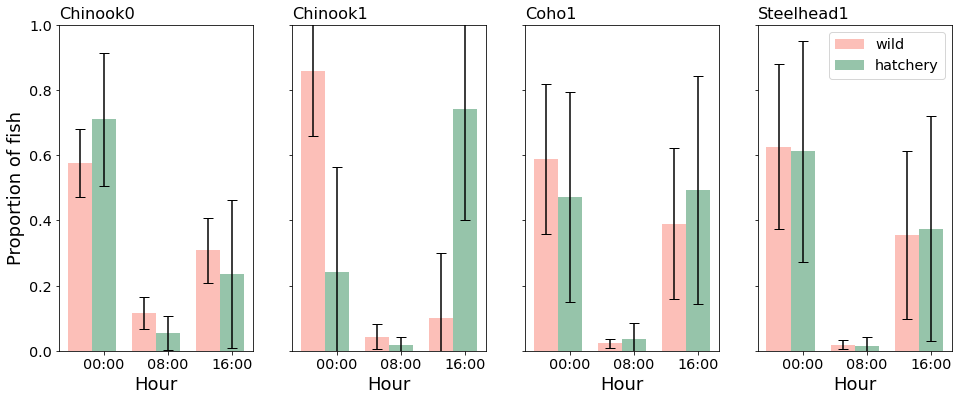

In [136]:
plot_by_hour_together()